In [1]:
#### Load the usual suspects

import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import urllib
import calendar
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import hmac
import hashlib
import requests
import base64
from urllib.parse import urlencode
import websocket
import gzip
import time
import threading
import pprint

In [106]:
# btcusdt
class extractData:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

    def on_open(self, ws):
        data = {
            "req": "market." + self.ticker + ".kline.60min",
            "id": "id1",
            "from": int(time.mktime(datetime.strptime(self.start, "%Y-%m-%d %H:%M:%S").timetuple())),
            "to": int(time.mktime(datetime.strptime(self.end, "%Y-%m-%d %H:%M:%S").timetuple()))}
        self.send_message(ws, data)

    def send_message(self, ws, message_dict):
        data = json.dumps(message_dict).encode()
        print("Sending Message:")
        pprint.pprint(message_dict)
        ws.send(data)

    def on_message(self, ws, message):
        unzipped_data = gzip.decompress(message).decode()
        msg_dict = json.loads(unzipped_data)
        print("Recieved Message: ")
        pprint.pprint(msg_dict)
        self.outputData(msg_dict['data'])
        
        if 'ping' in msg_dict:
            data = {
                "pong": msg_dict['ping']
            }
            self.send_message(ws, data)
            self.on_close(ws)
            print("Closing Connection")

    def on_error(self, ws, error):
        print("Error: " + str(error))
        error = gzip.decompress(error).decode()
        print(error)
        
    def on_close(self, ws):
        ws.close()
        print("### Connection closed ###")

    def outputData(self, recd_data):
        df = json_normalize(recd_data)
        df['datetime'] = pd.to_datetime(df.id, unit = 's') + pd.Timedelta(hours = 8)
        self.df = df
        
    def runConn(self):
        ws = websocket.WebSocketApp(
            "wss://api.huobi.pro/ws",
            on_open=self.on_open,
            on_message=self.on_message,
            on_error=self.on_error,
            on_close=self.on_close
        )
        ws.run_forever()
        # try: 
        #     ws.run_forever()
        # except Exception as e:
        #     print(e)

In [107]:
firstClass = extractData("ethusdt", "2023-09-01 00:00:00", end = "2023-09-01 23:00:00")
firstClass.runConn()

Sending Message:
{'from': 1693497600,
 'id': 'id1',
 'req': 'market.ethusdt.kline.60min',
 'to': 1693580400}
Recieved Message: 
{'data': [{'amount': 2486.54439562018,
           'close': 1650.43,
           'count': 6569,
           'high': 1689.25,
           'id': 1693497600,
           'low': 1648.63,
           'open': 1689.25,
           'vol': 4157567.533172766},
          {'amount': 2003.615101638431,
           'close': 1660.18,
           'count': 3560,
           'high': 1662.31,
           'id': 1693501200,
           'low': 1643.51,
           'open': 1651.01,
           'vol': 3318343.378591449},
          {'amount': 455.70587310811914,
           'close': 1657.45,
           'count': 1228,
           'high': 1664.48,
           'id': 1693504800,
           'low': 1655.33,
           'open': 1660.13,
           'vol': 756422.1435911002},
          {'amount': 969.8970754977006,
           'close': 1657.87,
           'count': 2585,
           'high': 1658.89,
           'id

TypeError: a bytes-like object is required, not 'TypeError'

In [123]:
output = []

def runConn(ticker, start, end):
    
    def on_open(ws):
        data = {
            "req": "market." + ticker + ".kline.60min",
            "id": "id1",
            "from": int(time.mktime(datetime.strptime(start, "%Y-%m-%d %H:%M:%S").timetuple())),
            "to": int(time.mktime(datetime.strptime(end, "%Y-%m-%d %H:%M:%S").timetuple()))}
        send_message(ws, data)

    def send_message(ws, message_dict):
        data = json.dumps(message_dict).encode()
        print("Sending Message:")
        pprint.pprint(message_dict)
        ws.send(data)

    def on_message(ws, message):
        unzipped_data = gzip.decompress(message).decode()
        msg_dict = json.loads(unzipped_data)
        print("Recieved Message: ")
        pprint.pprint(msg_dict)
        output.append(msg_dict)
        if 'ping' in msg_dict:
            data = {
                "pong": msg_dict['ping']
            }
            send_message(ws, data)
            on_close(ws)
            print("Closing Connection")

    def on_error(ws, error):
        print("Error: " + str(error))
        error = gzip.decompress(error).decode()
        print(error)
        
    def on_close(ws):
        ws.close()
        print("### Connection closed ###")

    ws = websocket.WebSocketApp(
        "wss://api.huobi.pro/ws",
        on_open=on_open,
        on_message=on_message,
        on_error=on_error,
        on_close=on_close
    )

    ws.run_forever()

In [125]:
runConn("btcusdt", start = "2023-09-01 00:00:00", end = "2023-09-01 23:00:00")

Sending Message:
{'from': 1693497600,
 'id': 'id1',
 'req': 'market.btcusdt.kline.60min',
 'to': 1693580400}
Recieved Message: 
{'data': [{'amount': 860.8881800255994,
           'close': 26234.48,
           'count': 47601,
           'high': 26920.44,
           'id': 1693497600,
           'low': 26224.5,
           'open': 26920.43,
           'vol': 22846835.35897757},
          {'amount': 401.094810890586,
           'close': 26332.61,
           'count': 23732,
           'high': 26396.5,
           'id': 1693501200,
           'low': 26145.39,
           'open': 26236.94,
           'vol': 10553079.782747135},
          {'amount': 273.99127535961975,
           'close': 26292.27,
           'count': 13576,
           'high': 26402.63,
           'id': 1693504800,
           'low': 26185.0,
           'open': 26328.63,
           'vol': 7212340.842723715},
          {'amount': 359.63387819425634,
           'close': 26162.92,
           'count': 18321,
           'high': 26316.5

TypeError: a bytes-like object is required, not 'TypeError'

In [605]:
import gzip
import json
import time
import pprint
from datetime import datetime
from pandas import json_normalize
import pandas as pd
import websocket
from scipy.optimize import minimize

def on_open(ws):
    data = {
        "req": "market." + ticker + ".kline.60min",
        "id": "id1",
        "from": int(time.mktime(datetime.strptime("2023-09-01 00:00:00", "%Y-%m-%d %H:%M:%S").timetuple())),
        "to": int(time.mktime(datetime.strptime("2023-09-01 23:00:00", "%Y-%m-%d %H:%M:%S").timetuple()))}
    send_message(ws, data)

def send_message(ws, message_dict):
    data = json.dumps(message_dict).encode()
    print("Sending Message:")
    pprint.pprint(message_dict)
    ws.send(data)

def on_message(ws, message):
    unzipped_data = gzip.decompress(message).decode()
    msg_dict = json.loads(unzipped_data)
    print("Recieved Message: ")
    pprint.pprint(msg_dict)
    data_output.append(msg_dict)
    if 'ping' in msg_dict:
        data = {
            "pong": msg_dict['ping']
        }
        send_message(ws, data)
        on_close(ws)
        print("Closing Connection")

def on_error(ws, error):
    print("Error: " + str(error))
    error = gzip.decompress(error).decode()
    print(error)
    
def on_close(ws):
    ws.close()
    print("### Connection closed ###")

def createDf():
    cleaned_df = []
    for j in data_output:
        if 'data' in j.keys():
            df = json_normalize(j['data'])
            df['datetime'] = pd.to_datetime(df.id, unit = 's') + pd.Timedelta(hours = 8)
            df['asset'] = list(set(j['rep'].split(".")).intersection(["btcusdt", "ethusdt", "ltcusdt"]))[0]
            cleaned_df.append(df)

    df = pd.concat(cleaned_df)
    portfoliio1 = pd.pivot(df[["close", "datetime", "asset"]], index='datetime', columns = 'asset', values='close')
    
    return portfoliio1, portfoliio1.pct_change().dropna()




data_output = []
ticker_list = ["btcusdt", "ethusdt", "ltcusdt"]
for ticker in ticker_list:
    try:
        ws = websocket.WebSocketApp(
            "wss://api.huobi.pro/ws",
            on_open=on_open,
            on_message=on_message,
            on_error=on_error,
            on_close=on_close
        )
        ws.run_forever()
    except Exception:
        print("error")


df, df_returns = createDf()
print(df)
print("Complete")

Sending Message:
{'from': 1693497600,
 'id': 'id1',
 'req': 'market.btcusdt.kline.60min',
 'to': 1693580400}
Recieved Message: 
{'data': [{'amount': 860.8881800255994,
           'close': 26234.48,
           'count': 47601,
           'high': 26920.44,
           'id': 1693497600,
           'low': 26224.5,
           'open': 26920.43,
           'vol': 22846835.35897757},
          {'amount': 401.094810890586,
           'close': 26332.61,
           'count': 23732,
           'high': 26396.5,
           'id': 1693501200,
           'low': 26145.39,
           'open': 26236.94,
           'vol': 10553079.782747135},
          {'amount': 273.99127535961975,
           'close': 26292.27,
           'count': 13576,
           'high': 26402.63,
           'id': 1693504800,
           'low': 26185.0,
           'open': 26328.63,
           'vol': 7212340.842723715},
          {'amount': 359.63387819425634,
           'close': 26162.92,
           'count': 18321,
           'high': 26316.5

In [628]:
from scipy.optimize import minimize

def efficientFrontier(annRetn, annStd):
    """
    To compute the efficient frontier: 
    1) Fix a target return level and minimize volatility for each target return
    2) Fix volatility level and maximize return for each target volatility
    """
    output_arr_min_var = []
    ret_out = []
    targetRangeRet = np.linspace(-0.01, 0.01, 500)
    portWeights = []
    
    def portfolio_returns(weights):
        return (np.sum(annRetn * weights))

    def portfolio_sd(weights):
        return np.sqrt(np.transpose(weights) @ (annStd) @ weights)

    def sharpe(weights):
        return (portfolio_returns(weights) / portfolio_sd(weights))

    def minimumVarOpt(constraints = None):
        """
        Minimum Variance Portfolio Optimization
        
        Parameters
        ----------
        nAssets : int, number of assets

        Returns
        -------
        list of portfolio weights
        """
        if constraints is not None:
            constraints = constraints
        else:
            constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        
        nAssets = df.shape[1]
        bounds = tuple(
            (0, 1) for j in range(nAssets)
        )
        eq_wts = np.array([1 / nAssets] * nAssets)

        min_var = minimize(
            fun = portfolio_sd, 
            x0 = eq_wts,
            method = 'SLSQP',
            bounds = bounds,
            constraints = constraints,
            options={'maxiter':300}
        )
        return min_var
    
    for target_return in targetRangeRet:
        constraints_min_var = (
        {'type': 'eq', 'fun': lambda x: portfolio_returns(x) - target_return}, 
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        )
        res_out = minimumVarOpt(constraints=constraints_min_var)
        print(res_out)
        if res_out['success']:
            output_arr_min_var.append(res_out['fun'])
            ret_out.append(target_return)
            weights = res_out['x'].tolist()
            weights.append(sharpe(res_out['x']))
            weights.append(portfolio_sd(res_out['x']))
            portWeights.append(weights)
        else:
            break
    
    wsCol = df.columns.to_list()
    wsCol.append('SharpeRatio')
    wsCol.append('SD')
    weightsAndSharpe = pd.DataFrame(portWeights, columns = wsCol)

    return output_arr_min_var, ret_out, weightsAndSharpe

In [703]:
returns = (1 + df_returns).prod() - 1
stdev = (df_returns).cov()
vol, ret, w_s = efficientFrontier(annRetn=returns, annStd=stdev)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0029907969568809005
       x: [ 7.447e-02  9.255e-01  5.551e-17]
     nit: 2
     jac: [ 3.110e-03  2.981e-03  3.747e-03]
    nfev: 8
    njev: 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0029900243998752045
       x: [ 6.835e-02  9.317e-01  1.110e-16]
     nit: 2
     jac: [ 3.105e-03  2.982e-03  3.744e-03]
    nfev: 8
    njev: 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0029892833619601282
       x: [ 6.222e-02  9.378e-01  0.000e+00]
     nit: 2
     jac: [ 3.100e-03  2.982e-03  3.741e-03]
    nfev: 8
    njev: 2
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0029885738665818146
       x: [ 5.610e-02  9.439e-01  1.110e-16]
     nit: 2
     jac: [ 3.095e-03  2.982e-03  3.738e-03]
    nfev: 8
    njev: 2
 message: Optimization terminated successfully
 success: True
  status: 

Text(0.5, 0.98, 'Random Portfolios')

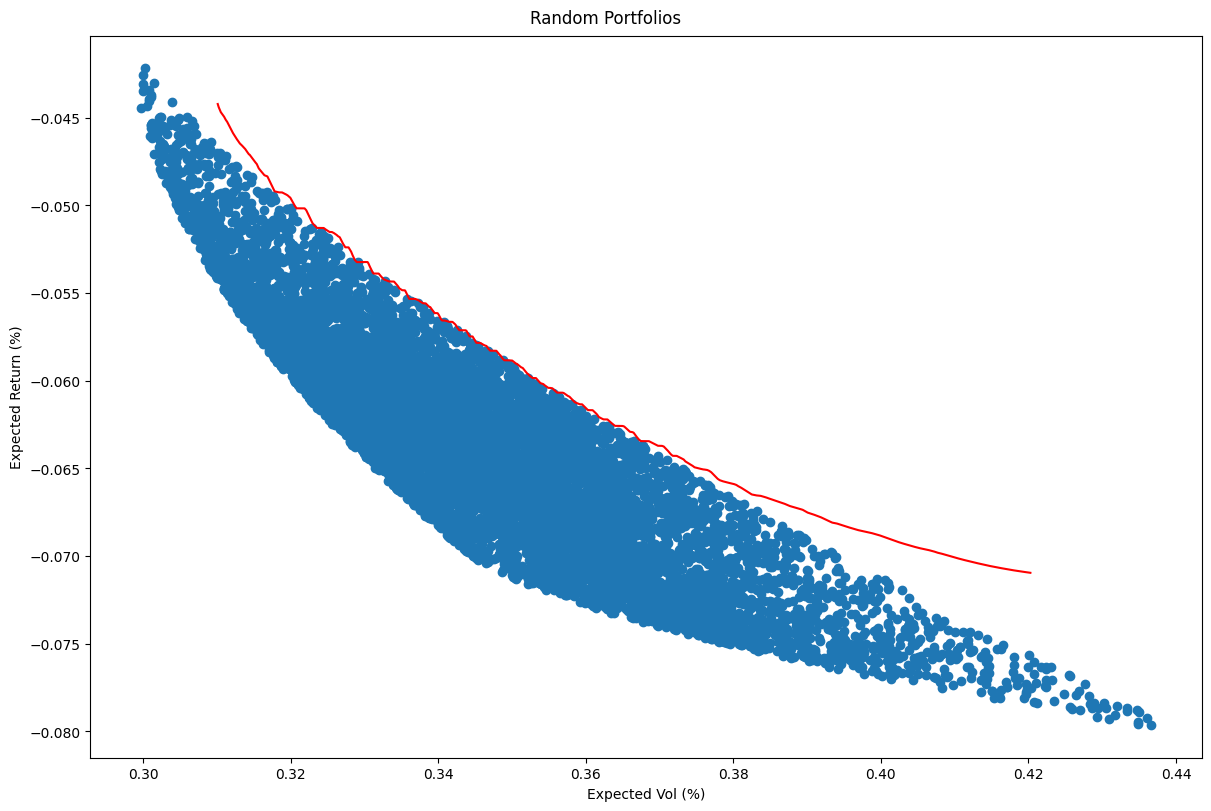

In [693]:
returns_list = []
vol_list = []
wts_list = []
expRet = df_returns.mean().values * 100
data_cov = (df_returns * 100).cov()

fnt_size = 10

for i in range(10000):
    wts = np.random.random(3)
    norm_wts = wts / np.sum(wts)
    wts_list.append(norm_wts)

    randPortReturn = expRet.dot(norm_wts)
    returns_list.append(randPortReturn)
    
    randPortVar = np.dot(np.dot(norm_wts.T, data_cov), norm_wts)
    randPortStd = np.sqrt(randPortVar)
    vol_list.append(randPortStd)

ports = pd.DataFrame({'Return':returns_list, 'Vol':vol_list})
wts_df = pd.DataFrame(np.vstack(tuple(wts_list)), columns=['btcusdt', 'ethusdt', 'ltcusdt'])
rand_ports = pd.concat([ports, wts_df], axis=1)

frontier1 = rand_ports.sort_values(by='Vol')[["Return", "Vol"]].rolling(250).max().dropna().rolling(100).mean()

fig, ax = plt.subplots(1, 1, figsize=(12, 8), constrained_layout=True)

ax.scatter(ports.Vol, ports.Return)
ax.plot(frontier1.Vol, frontier1.Return, color = 'red')
ax.set_xlabel("Expected Vol (%)", fontsize=fnt_size)
ax.set_ylabel("Expected Return (%)", fontsize=fnt_size)
ax.xaxis.set_tick_params(which='both', labelbottom=True, labelsize=fnt_size)
ax.yaxis.set_tick_params(which='both', labelbottom=True, labelsize=fnt_size)

fig.suptitle("Random Portfolios")


In [ ]:
# Sub-optimal solution which is under the belly of the efficient frontier, not an investable portfolio.

In [660]:
rand_ports['sharpe'] = rand_ports['Return'] / rand_ports['Vol']
rand_ports

,Return,Vol,btcusdt,ethusdt,ltcusdt,sharpe
0,-0.063077,0.350404,0.196028,0.384982,0.418991,-0.180011
1,-0.061432,0.325723,0.593493,0.321898,0.084609,-0.188603
2,-0.054975,0.325763,0.142277,0.607005,0.250718,-0.168759
3,-0.051561,0.306333,0.362093,0.636365,0.001542,-0.168317
4,-0.055242,0.330977,0.073184,0.618457,0.308358,-0.166907
...,...,...,...,...,...,...
9995,-0.064245,0.340598,0.439035,0.290653,0.270312,-0.188624
9996,-0.055091,0.332702,0.040334,0.631049,0.328617,-0.165585
9997,-0.067899,0.370985,0.175123,0.266822,0.558055,-0.183024
9998,-0.073201,0.367327,0.576136,0.024641,0.399224,-0.199280
